**1. Data Loading and Preprocessing**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
# File path in Databricks FileStore
file_path = '/dbfs/FileStore/tables/Data File/titanic.csv'

# Read the file using Pandas
df = pd.read_csv(file_path)

# Set the option to display all columns
pd.set_option('display.max_columns', None)


The structure of the Titanic dataset is 891 x 12.

In [0]:
print(df.shape)

(891, 12)


Below shows the column names and data types of Titanic dataset.

In [0]:
# Summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Below, I found numbers of missing value per each column, its percentage and also the total numbers of rows that have missing value. Cabin column has the most missing value which is 687 or 77.10%; Age column has 177 or 19.87% missing values, Embarked has 2 or 0.22% missing values. The total missing values are 866.

In [0]:
print("Missing Values Per Column:\n", df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())
print("\nPercentage of Missing Values Per Column:\n", (df.isnull().sum() / len(df)) * 100)

Missing Values Per Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total Missing Values: 866

Percentage of Missing Values Per Column:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


To handle the missing value, I decided to drop Cabin column becasue 77.1% of missing value looks too high for me. 

The missing values in age column are replaced by a randomly selected value from the non-missing values of the age column. The missing values in the age column are handled in this way becasue I want to keep the distribution as close as to the original dataset for the Age column.

The percentage of missing values for the Embarked column is just 0.22%, so I decided to replace the missing values with mode in the Embarked column.

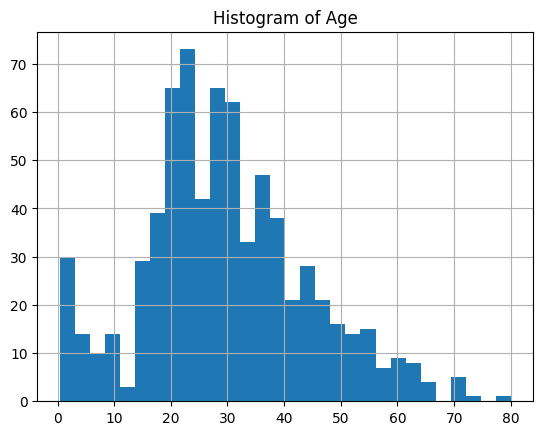

In [0]:
# Example data
df['Age'].hist(bins=30)
plt.title('Histogram of Age')
plt.show()


In [0]:
# Drops the Cabin column
df = df.drop(columns=['Cabin'])

import numpy as np
df['Age'] = df['Age'].apply(lambda x: x if not np.isnan(x) else np.random.choice(df['Age'].dropna()))

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Below are the summary statistics and visualize data distributions for categorical and numeric columns.


 Distribution of Sex:
 male      577
female    314
Name: Sex, dtype: int64

 Proportion of Sex:
 male      0.647587
female    0.352413
Name: Sex, dtype: float64

 Unique values of Sex 
 ['male' 'female']


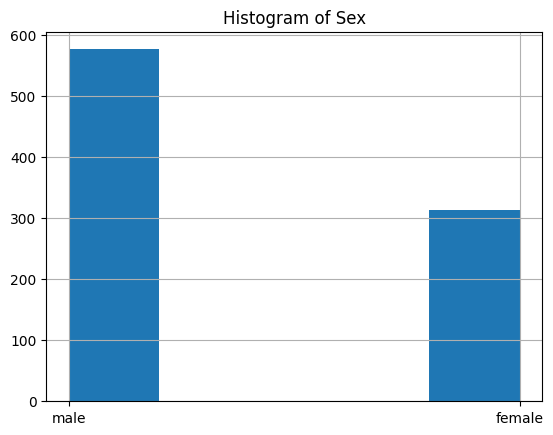

In [0]:
# Check distribution
distribution = df['Sex'].value_counts()
print("\n Distribution of Sex:\n", distribution)

print("\n Proportion of Sex:\n", df['Sex'].value_counts(normalize=True))

unique_values = df['Sex'].unique()
print("\n Unique values of Sex \n", unique_values)

df['Sex'].hist(bins=5)
plt.title('Histogram of Sex')
plt.show()


 Distribution of Embarked:
 S    646
C    168
Q     77
Name: Embarked, dtype: int64

 Proportion of Embarked:
 S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

 Unique values of Embarked 
 ['S' 'C' 'Q']


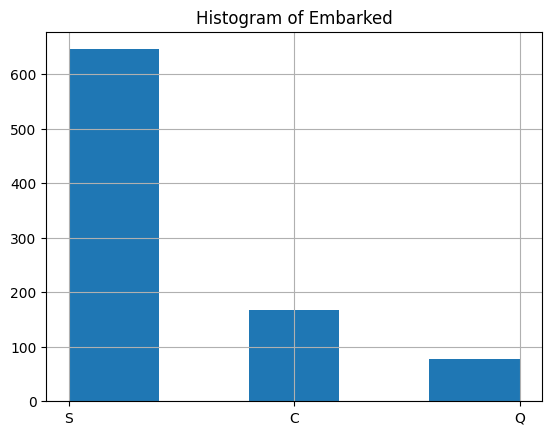

In [0]:
# Check distribution
distribution = df['Embarked'].value_counts()
print("\n Distribution of Embarked:\n", distribution)

print("\n Proportion of Embarked:\n", df['Embarked'].value_counts(normalize=True))

unique_values = df['Embarked'].unique()
print("\n Unique values of Embarked \n", unique_values)

df['Embarked'].hist(bins=5)
plt.title('Histogram of Embarked')
plt.show()

In [0]:
# Summary statistics for numeric columns
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.782278    0.523008   
std     257.353842    0.486592    0.836071   14.467495    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.250000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


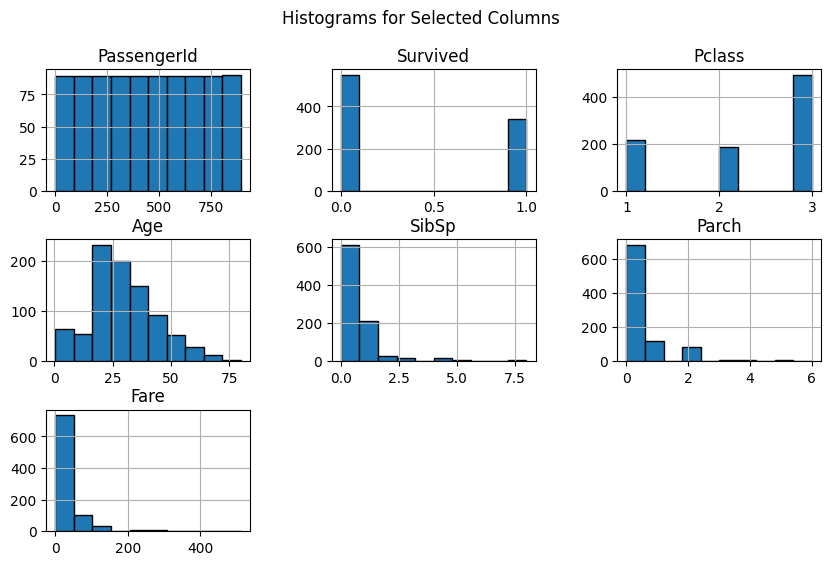

In [0]:
# Plot histograms for selected columns
columns_to_plot = ['PassengerId', 'Survived','Pclass','Age','SibSp','Parch','Fare']
df[columns_to_plot].hist(bins=10, figsize=(10, 6), edgecolor='black')
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Increase space between plots
plt.suptitle('Histograms for Selected Columns')
plt.show()

**2. Exploratory Data Analysis**

Survived is a dummy variable with 0 means death and 1 means survival. There are 549 rows equal 0 and 342 rows equal 1 in Survived column. Therefore, the survival rate is 38.38% (342/891 *100).

In [0]:
print("\nFrequency counts for survived\n", df['Survived'].value_counts())
print("\nPercentage counts for survived\n", df['Survived'].value_counts(normalize=True))


Frequency counts for survived
 0    549
1    342
Name: Survived, dtype: int64

Percentage counts for survived
 0    0.616162
1    0.383838
Name: Survived, dtype: float64


I used pandas crosstab to explore the relationship between Pclass and survival. The results show that Third class passeger had the highest chance to die, about 75.76%, and the First class passenger had the highest chance to survival, about 62.96%. 

In [0]:
sur_pclss = pd.crosstab(df['Survived'], df['Pclass'])
print(sur_pclss)
print('\n')
sur_pclass_pct = pd.crosstab(df['Survived'], df['Pclass'], normalize='columns') * 100
print(sur_pclass_pct)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Pclass            1          2          3
Survived                                 
0         37.037037  52.717391  75.763747
1         62.962963  47.282609  24.236253


Compared survival rates by gender, I found that female had a higher survival rate compared to male. Female had 74.20% chance to survive in the Titanic disaster, and male had 18.89% chance to survive.

In [0]:
sur_sex = pd.crosstab(df['Survived'], df['Sex'])
print(sur_sex)
print('\n')
sur_sex_pct = pd.crosstab(df['Survived'], df['Sex'], normalize='columns') * 100
print(sur_sex_pct)

Sex       female  male
Survived              
0             81   468
1            233   109


Sex          female       male
Survived                      
0         25.796178  81.109185
1         74.203822  18.890815


I divided Age column into 5 group:<br>
0 to 5 years old,<br>
6 to 18 years old,<br>
19 to 30 years old,<br>
31 to 60 years old,<br>
and greater than 60 years old.

I found that people with age between 0 to 5 had the higher chance to survive, about 62.26%.

In [0]:
# Custom function to classify ages
def classify_age(age):
    if age <= 5:
        return 'age 0 to 5'
    elif age <= 18:
        return 'age 6 to 18'
    elif age <= 30:
        return 'age 19 to 30'
    elif age <= 60:
        return 'age 31 to 60'
    else:
        return "age greater than 60"

# Apply custom function
df['Age_group'] = df['Age'].apply(classify_age)

sur_age = pd.crosstab(df['Survived'], df['Age_group'])
sur_age = sur_age.reindex(
    index=[0, 1], 
    columns=['age 0 to 5', 'age 6 to 18', 'age 19 to 30', 'age 31 to 60', 'age greater than 60']
)
print(sur_age)

sur_age_pct = pd.crosstab(df['Survived'], df['Age_group'], normalize='columns') * 100
sur_age_pct = sur_age_pct.reindex(
    index=[0, 1], 
    columns=['age 0 to 5', 'age 6 to 18', 'age 19 to 30', 'age 31 to 60', 'age greater than 60']
)
print('\n')
print(sur_age_pct)

Age_group  age 0 to 5  age 6 to 18  age 19 to 30  age 31 to 60  \
Survived                                                         
0                  20           70           223           212   
1                  34           43           115           145   

Age_group  age greater than 60  
Survived                        
0                           24  
1                            5  


Age_group  age 0 to 5  age 6 to 18  age 19 to 30  age 31 to 60  \
Survived                                                         
0           37.037037    61.946903     65.976331     59.383754   
1           62.962963    38.053097     34.023669     40.616246   

Age_group  age greater than 60  
Survived                        
0                    82.758621  
1                    17.241379  


**3 Feature Engineering**

I created Age Bins column to categorize passengers into different age groups: child (less or equal 18), adult (greater than 18 or less and equal to 60), and senior (greater than 60). It showed that adult had the largest proportion, about 78%.

The Family Size column was created by summing the SibSp and Parch columns. It reveals that a Family Size of 0 accounts for the largest proportion, approximately 60.27%, followed by a Family Size of 1, which makes up 18.07%.

The Title column was created by extracting titles such as Mr., Mrs., and Miss from the Name column. Among the entries, 62.72% are titled "Mr.," followed by "Miss" at 22.09% and "Mrs." at 15.17%.

In [0]:
# Custom function to classify ages
def classify_age(age):
    if age <= 18:
        return 'child'
    elif age <=60:
        return 'adult'
    else:
        return "senior"

# Apply custom function
df['Age_group2'] = df['Age'].apply(classify_age)
print("Frequency counts for Age Bins\n", df['Age_group2'].value_counts())
print("\nPercentage counts for Age Bins\n", df['Age_group2'].value_counts(normalize=True))

Frequency counts for Age Bins
 adult     695
child     167
senior     29
Name: Age_group2, dtype: int64

Percentage counts for Age Bins
 adult     0.780022
child     0.187430
senior    0.032548
Name: Age_group2, dtype: float64


In [0]:
df['Family Size'] = df['SibSp'] + df['Parch']
print("Frequency counts for Family Size\n", df['Family Size'].value_counts())
print("\nPercentage counts for Family Size\n", df['Family Size'].value_counts(normalize=True))

Frequency counts for Family Size
 0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family Size, dtype: int64

Percentage counts for Family Size
 0     0.602694
1     0.180696
2     0.114478
3     0.032548
5     0.024691
4     0.016835
6     0.013468
10    0.007856
7     0.006734
Name: Family Size, dtype: float64


In [0]:
def extract_title(name):
    if 'Mr.' in name:
        return 'Mr.'
    elif 'Mrs.' in name:
        return 'Mrs.'
    elif 'Miss' in name:
        return 'Miss'
    else:
        return None

# Apply the function row-wise
df['Title'] = df['Name'].apply(extract_title)

print("Frequency counts for Title\n", df['Title'].value_counts())
print("\nPercentage counts for Title\n", df['Title'].value_counts(normalize=True))

Frequency counts for Title
 Mr.     517
Miss    182
Mrs.    125
Name: Title, dtype: int64

Percentage counts for Title
 Mr.     0.627427
Miss    0.220874
Mrs.    0.151699
Name: Title, dtype: float64


**Perform encoding**

I performed encoding (one-hot) for categorical variables like, Embarked, Sex and Pclass.

In [0]:
# Perform one-hot encoding
# One-hot encoding multiple columns while keeping the originals
df_with_dummies = pd.concat(
    [
        df,
        pd.get_dummies(df['Embarked'], prefix='Embarked'),
        pd.get_dummies(df['Sex'], prefix='Sex'),
        pd.get_dummies(df['Pclass'], prefix='Pclass')
    ],
    axis=1
)

print(df_with_dummies)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# 4. Data Visualization

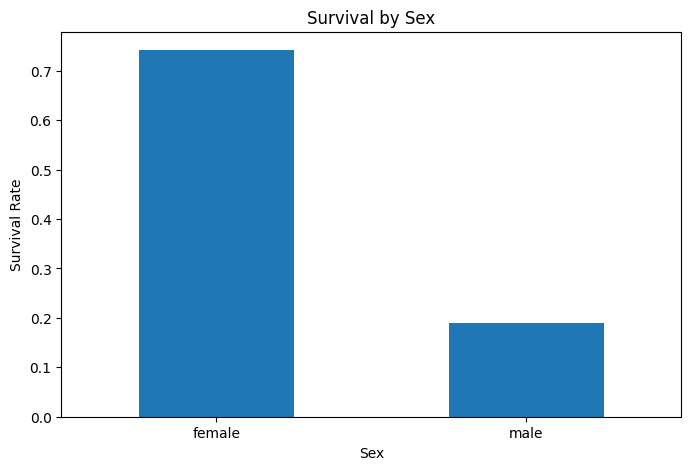

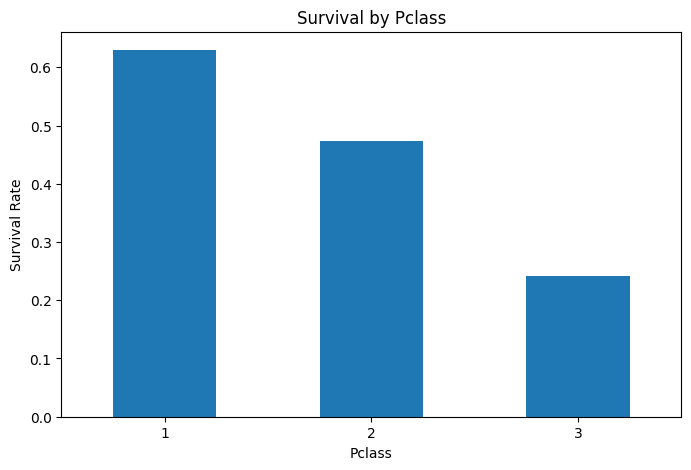

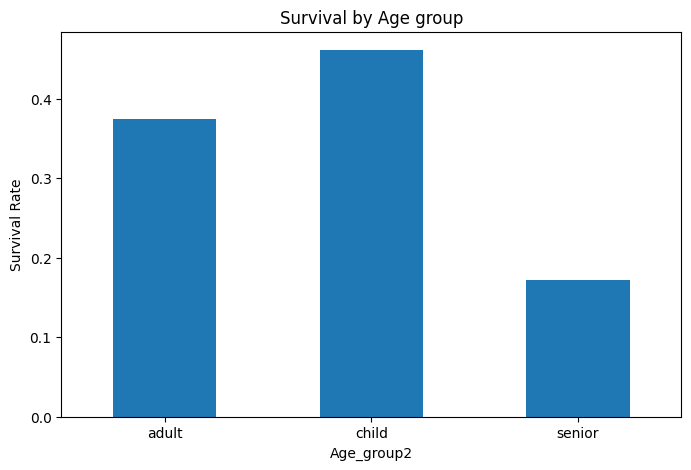

In [0]:
# Compare survival by Sex
survival_by_sex = df.groupby('Sex')['Survived'].mean()

# Compare survival by Pclass
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()

# Compare survival by Embarked
survival_by_embarked = df.groupby('Age_group2')['Survived'].mean()


# Plot survival by Sex
plt.figure(figsize=(8, 5))
survival_by_sex.plot(kind='bar')
plt.title('Survival by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.show()

# Plot survival by Pclass
plt.figure(figsize=(8, 5))
survival_by_pclass.plot(kind='bar')
plt.title('Survival by Pclass')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.xticks(rotation=0)
plt.show()

# Plot survival by Embarked
plt.figure(figsize=(8, 5))
survival_by_embarked.plot(kind='bar')
plt.title('Survival by Age group')
plt.ylabel('Survival Rate')
plt.xlabel('Age_group2')
plt.xticks(rotation=0)
plt.show()


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.021081 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.070458 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.297495  0.083081  0.018443   
Age             0.021081 -0.070458 -0.297495  1.000000 -0.208691 -0.156525   
SibSp          -0.057527 -0.035322  0.083081 -0.208691  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.156525  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.087982  0.159651  0.216225   
Family Size    -0.040143  0.016639  0.065997 -0.220831  0.890712  0.783111   

                 Fare  Family Size  
PassengerId  0.012658    -0.040143  
Survived     0.257307     0.016639  
Pclass      -0.549500     0.065997  
Age          0.087982    -0.220831  
SibSp        0.159651     0.890712  
Parch        0.216225     0.783111  
Fare         1.000000     0.217138  
F

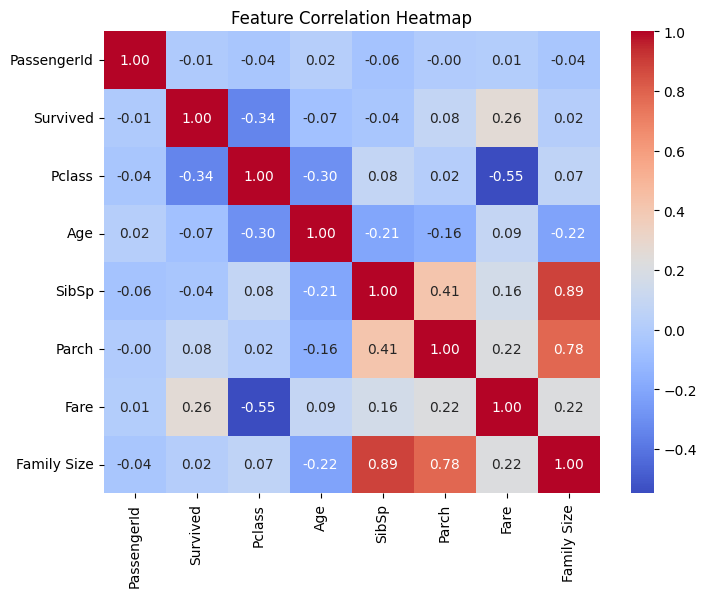

In [0]:
import seaborn as sns

# Compute correlations
correlation_matrix = df.corr()

print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Customize the plot
plt.title('Feature Correlation Heatmap')
plt.show()

In [0]:
import plotly.express as px
# Grouped box plot
fig = px.box(df, x='Pclass', y='Fare', title='Distribution of Fares Across Passenger Classes')
fig.show()

In [0]:
sur_family_pct = pd.crosstab(df['Survived'], df['Family Size'], normalize='columns') * 100
print(sur_family_pct)

Family Size         0          1          2          3     4          5   \
Survived                                                                   
0            69.646182  44.720497  42.156863  27.586207  80.0  86.363636   
1            30.353818  55.279503  57.843137  72.413793  20.0  13.636364   

Family Size         6      7      10  
Survived                              
0            66.666667  100.0  100.0  
1            33.333333    0.0    0.0  


In [0]:
# Custom function to classify Fare
def classify_fare(fare):
    if fare <= 7.91:
        return '25% percentile'
    elif fare <= 14.45:
        return '50% percentile'
    elif fare <= 31.00:
        return '75% percentile'
    else:
        return "Above 75% percentile"

# Apply custom function
df['Fare_group'] = df['Fare'].apply(classify_fare)

sur_fare_group_pct = pd.crosstab(df['Survived'], df['Fare_group'], normalize='columns') * 100
print(sur_fare_group_pct)

Fare_group  25% percentile  50% percentile  75% percentile  \
Survived                                                     
0                80.269058       69.124424       55.458515   
1                19.730942       30.875576       44.541485   

Fare_group  Above 75% percentile  
Survived                          
0                      41.891892  
1                      58.108108  


**Insights about Titanic dataset**

Key Factors Influencing Titanic Passenger Survival:<br>
**Gender**: Women were more likely to survive than men (74.20% vs. 18.89%).<br>
**Class**: First-class passengers had the highest survival rate (62.96%), followed by Second-class passengers (47.28%) and Third-class passengers (24.24%). These results align with expectations, as First-class passengers were generally accommodated on higher decks of the Titanic compared to those in Second and Third-class. Being on higher decks likely provided First-class passengers with more time to access lifeboats and escape when the ship began sinking, increasing their chances of survival.<br>
**Age**: Babies (aged 0 to 5) had the highest survival rate (62.26%), followed by individuals aged 31 to 60, with a survival rate of approximately 40.28%.<br>
**Family Size**: Passengers with 3 relatives on board had the highest survival rate (72.41%), followed by passengers with 2 relatives (57.84%) and those with 1 relative (55.28%).<br>
**Fare**: Passengers who paid higher fares (above the 75th percentile) had a survival rate of 58.11%, while those who paid fares up to the 75th percentile had a survival rate of 44.54%. Passengers who paid lower fares experienced a significantly higher death rate.